In [16]:
import os
import zipfile
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [5]:
!pip install cmake
!pip install dlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 50.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3374777 sha256=9da927abdcb24b8992c728da0c4342ebb45b8c80ee474206a1dd32ee8f2cdd9a
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
Successfully built dlib


In [6]:
import dlib

In [17]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 41.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
google-cloud-

In [18]:
import mediapipe as mp

2024-08-17 12:32:44.696185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 12:32:44.696452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 12:32:44.868812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Path to the images 
image_folder_path = '/kaggle/input/part-3/part3/'

# Collecting all image paths
image_paths = glob(os.path.join(image_folder_path, '*.jpg'))

# Printing the number of images found
print(len(image_paths))

3250


# Libraries and Models For Face Detection

**OpenCv Accuracy**

In [3]:
# Update the path to the actual location of the XML file
cascade_path = '/kaggle/input/haarcascade/other/default/1/haarcascade_frontalface_default.xml'

# Load the Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    print("Error loading cascade file. Check the path and file name.")
else:
    print("Cascade loaded successfully.")

Cascade loaded successfully.


In [5]:
# Initializing counters
total_faces = len(image_paths)
correct_detections = 0
no_face_detected_images = []

# Loop through each image and apply the face detector
for img_path in image_paths:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # Check if at least one face was detected
    if len(faces) > 0:
        correct_detections += 1
    else:
        # Store images with no detected faces
        no_face_detected_images.append(img)
        


In [12]:
# SHOWING IN VERTICAL
# # After processing all images, display images with no detected faces
# for img in no_face_detected_images:
#     plt.figure()
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title("Image without Detected Faces")
#     plt.axis('off')  # Hide axis
#     plt.show()


# SHOWING IN HORIZONTAL
# Number of images to display in one row
num_images_per_row = 5

# Calculating the total number of rows needed
num_rows = (len(no_face_detected_images) + num_images_per_row - 1) // num_images_per_row

# Creating a figure with the appropriate size
plt.figure(figsize=(20, num_rows * 4))  # Height Adjustment

# Looping through each image and displaying it in a grid
for i, img in enumerate(no_face_detected_images):
    plt.subplot(num_rows, num_images_per_row, i + 1)  # Arranging images in a grid
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hiding the axes to remove axis points
    plt.title(f"Image {i + 1}") 

# Showing the entire figure
plt.show()

In [13]:
# Calculating and printing the accuracy
accuracy = (correct_detections / total_faces) * 100
print(f"Accuracy of OpenCV Cascade face detector: {accuracy:.2f}%")

Accuracy of OpenCV Cascade face detector: 94.12%


**Dlibs Accuracy**

In [29]:
# Load the Dlib HOG face detector
hog_face_detector = dlib.get_frontal_face_detector()

In [26]:
# Initializing counters for Dlib
total_faces_dlib = len(image_paths)
correct_detections_dlib = 0
no_face_detected_images_dlib = []

In [30]:
# Looping through each image and apply the Dlib HOG face detector
for img_path in image_paths:
    img_dlib = cv2.imread(img_path)
    gray_dlib = cv2.cvtColor(img_dlib, cv2.COLOR_BGR2GRAY)
    faces_dlib = hog_face_detector(gray_dlib)

    # Check if at least one face was detected
    if len(faces_dlib) > 0:
        correct_detections_dlib += 1
    else:
        # Store images with no detected faces
        no_face_detected_images_dlib.append(img_dlib)

In [32]:
print(len(no_face_detected_images_dlib))

62


In [13]:
# Number of images to display in one row
num_images_per_row = 5

# Calculate the total number of rows needed
num_rows = (len(no_face_detected_images_dlib) + num_images_per_row - 1) // num_images_per_row

# Create a figure with the appropriate size
plt.figure(figsize=(20, num_rows * 4))  # Adjust the height as needed

# Loop through each image and display it in a grid
for i, img in enumerate(no_face_detected_images_dlib):
    plt.subplot(num_rows, num_images_per_row, i + 1)  # Arrange images in a grid
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axes
    plt.title(f"Image {i + 1}")  # Add a title if needed

# Show the entire figure
plt.show()

In [7]:
# Calculating and printing the accuracy for Dlib HOG face detector
accuracy = (correct_detections_dlib / total_faces) * 100
print(f"Accuracy of Dlib HOG face detector: {accuracy:.2f}%")

**Caffe Model Accuracy**

In [4]:
# Loading the Caffe model for face detection
model_file = '/kaggle/input/caffe-model/other/default/1/deploy.prototxt.txt'
pretrained_file = '/kaggle/input/caffe-model/other/default/1/res10_300x300_ssd_iter_140000_fp16.caffemodel'

In [5]:
# Loading the Caffe model using OpenCV's DNN module
caffe_net = cv2.dnn.readNetFromCaffe(model_file, pretrained_file)  # Reading the Caffe model

In [7]:
# Enabling GPU support for faster processing
# caffe_net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)  # Setting backend to CUDA for GPU support
# caffe_net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)  # Setting target to CUDA for GPU support
# print("Set Successfully")

In [6]:
# Initializing counters for Caffe model face detection
total_faces_caffe = len(image_paths)  # Initializing the total number of images to process
correct_detections_caffe = 0  # Initializing the counter for correctly detected faces
no_face_detected_images_caffe = []  # Initializing the list to store images where no faces are detected

In [8]:
# Looping through each image and applying the Caffe model face detector
for img_path in image_paths:
    img_caffe = cv2.imread(img_path)  # Reading the image from the file
    (h, w) = img_caffe.shape[:2]  # Getting the height and width of the image
    blob = cv2.dnn.blobFromImage(cv2.resize(img_caffe, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))  # Pre-processing the image to create a blob
    caffe_net.setInput(blob)  # Setting the input to the network
    detections_caffe = caffe_net.forward()  # Performing face detection

    # Checking if any face was detected
    detected = False
    for i in range(0, detections_caffe.shape[2]):
        confidence = detections_caffe[0, 0, i, 2]  # Getting the confidence level for the detection
        if confidence > 0.5:  # If confidence is above 50%, considering it as a face detection
            correct_detections_caffe += 1  # Incrementing the correct detections counter
            detected = True
            break

    if not detected:
        no_face_detected_images_caffe.append(img_caffe)  # Storing images with no detected faces


In [9]:
print(len(no_face_detected_images_caffe))

2


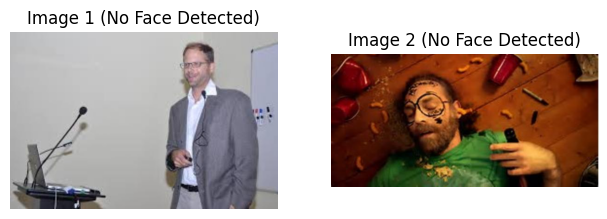

In [11]:
# Displaying images with no detected faces using Matplotlib
num_images_per_row_caffe = 5  # Setting the number of images to display per row
num_rows_caffe = (len(no_face_detected_images_caffe) + num_images_per_row_caffe - 1) // num_images_per_row_caffe  # Calculating the number of rows needed
plt.figure(figsize=(20, 4 * num_rows_caffe))  # Setting the figure size based on the number of rows

# Looping through each image and displaying it in a grid
for i, img in enumerate(no_face_detected_images_caffe):
    plt.subplot(num_rows_caffe, num_images_per_row_caffe, i + 1)  # Arranging images in rows and columns
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converting the image color from BGR to RGB and displaying it
    plt.axis('off')  # Hiding the axes
    plt.title(f"Image {i+1} (No Face Detected)")  # Setting a title for each image
plt.show()  # Displaying the images

In [10]:
# Calculating and printing the accuracy for the Caffe model face detector
accuracy_caffe = (correct_detections_caffe / total_faces_caffe) * 100  # Calculating the accuracy
print(f"Accuracy of Caffe face detector: {accuracy_caffe:.2f}%")  # Printing the accuracy

Accuracy of Caffe face detector: 99.94%


**Mediapipe Accuracy**

In [19]:
# Initializing MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [20]:
# Initializing counters for MediaPipe
total_faces_mediapipe = len(image_paths)
correct_detections_mediapipe = 0
no_face_detected_images_mediapipe = []

In [22]:
# Loading the MediaPipe Face Detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:

    # Looping through each image and applying the MediaPipe Face Detection
    for img_path in image_paths:
        img_mediapipe = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_mediapipe, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        results = face_detection.process(img_rgb)

        # Checking if at least one face was detected
        if results.detections:
            correct_detections_mediapipe += 1
        else:
            # Storing images with no detected faces
            no_face_detected_images_mediapipe.append(img_mediapipe)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1723898036.114043     281 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/conda/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


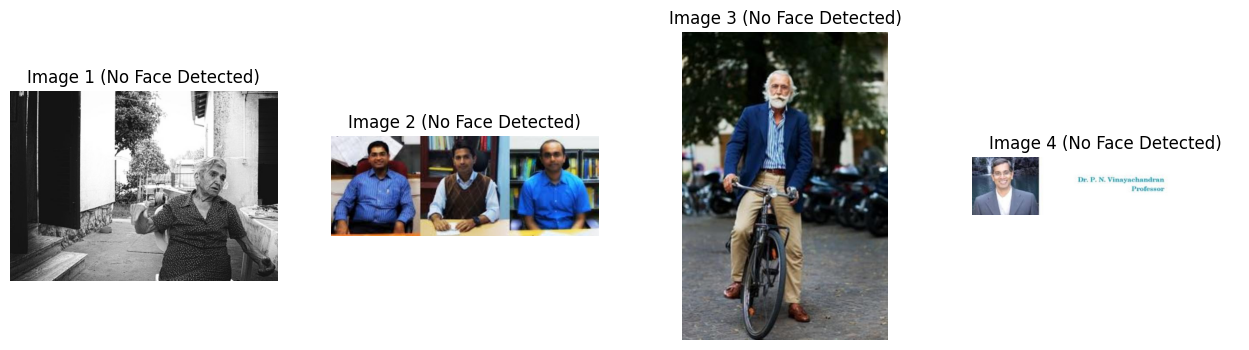

In [24]:
# Displaying images with no detected faces using Matplotlib
num_images_per_row_mediapipe = 5
num_rows_mediapipe = (len(no_face_detected_images_mediapipe) + num_images_per_row_mediapipe - 1) // num_images_per_row_mediapipe
plt.figure(figsize=(20, 4 * num_rows_mediapipe))

for i, img in enumerate(no_face_detected_images_mediapipe):
    plt.subplot(num_rows_mediapipe, num_images_per_row_mediapipe, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} (No Face Detected)")
plt.show()

In [23]:
# Calculating and printing the accuracy for MediaPipe Face Detection
accuracy_mediapipe = (correct_detections_mediapipe / total_faces_mediapipe) * 100
print(f"Accuracy of MediaPipe face detector: {accuracy_mediapipe:.2f}%")

Accuracy of MediaPipe face detector: 99.88%
